# Purpose
This file trains `num_optimizers` LSTM and GNN optimizers, use them to perform certain tasks, and then compare the statistics of their performance.

In [1]:
import torch

from trainUtil.trainingLSTM import trainLSTM
from trainUtil.trainingGNN import trainGNN

In [2]:
# Constants
num_optimizers = 10

In [3]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [4]:
# Trains optimizer
for i in range(num_optimizers):
    print(f"Training lstm-{i}")
    trainLSTM(3, f'trained_model/lstm_optimizer_{i}.pth')

    print(f"Training gnn-{i}")
    trainGNN(3, f'trained_model/gnn_optimizer_{i}.pth')

Training lstm-0
0-th optimizee
Epoch 0
Batch 0 / 469, Model loss: 2.3557214736938477
Batch 125 / 469, Model loss: 0.6286089420318604
Batch 250 / 469, Model loss: 0.42230042815208435
Batch 375 / 469, Model loss: 0.2537669241428375
Epoch 1
Batch 0 / 469, Model loss: 0.29018959403038025
Batch 125 / 469, Model loss: 0.41859161853790283
Batch 250 / 469, Model loss: 0.36551350355148315
Batch 375 / 469, Model loss: 0.27287986874580383
1-th optimizee
Epoch 0
Batch 0 / 469, Model loss: 2.299006938934326
Batch 125 / 469, Model loss: 0.5245992541313171
Batch 250 / 469, Model loss: 0.36455240845680237
Batch 375 / 469, Model loss: 0.23145566880702972
Epoch 1
Batch 0 / 469, Model loss: 0.24291564524173737
Batch 125 / 469, Model loss: 0.3329777121543884
Batch 250 / 469, Model loss: 0.2829943597316742
Batch 375 / 469, Model loss: 0.18678027391433716
2-th optimizee
Epoch 0
Batch 0 / 469, Model loss: 2.296865940093994
Batch 125 / 469, Model loss: 0.8152872323989868
Batch 250 / 469, Model loss: 0.4499038

## Comparison

In [4]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

from models.mnist_nets import deep_net

In [5]:
# Hyperparameters
batch_size = 128
epochs = 5

In [6]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [7]:
# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

print(f"Number of batches: {len(train_dataloader)}")

Number of batches: 469


In [8]:
loss_fn = nn.CrossEntropyLoss()

In [9]:
from copy import deepcopy
model = deep_net(28*28, 10).to(device)
model_for_lstm = [deepcopy(model) for _ in range(num_optimizers)]
model_for_gnn= [deepcopy(model) for _ in range(num_optimizers)]

In [10]:
his_lstm = [[] for _ in range(num_optimizers)]
his_gnn = [[] for _ in range(num_optimizers)]

In [11]:
from models.optim_nets import lstm_l2o_optimizer
from trainUtil.train_with_LSTM import train_with_lstm
from models.optim_nets import gnn_l2o_optimizer
from trainUtil.train_with_GNN import train_with_GNN

In [12]:
# Train with lstm
for i in range(num_optimizers):
    lstm_optimizer = lstm_l2o_optimizer().to(device)
    lstm_optimizer.load_state_dict(torch.load(f"trained_model/lstm_optimizer_{i}.pth"))
    lstm_optimizer.eval()

    his_lstm[i] = train_with_lstm(lstm_optimizer, model_for_lstm[i], train_dataloader, num_epochs=4)
    
    his_lstm[i] = torch.tensor(his_lstm[i]).reshape(-1)

Epoch: 1
loss: 2.312834  [    0/60000]
loss: 1.033126  [12800/60000]
loss: 0.813387  [25600/60000]
loss: 0.618208  [38400/60000]
loss: 0.693585  [51200/60000]
Epoch: 2
loss: 0.475306  [    0/60000]
loss: 0.511703  [12800/60000]
loss: 0.510819  [25600/60000]
loss: 0.458271  [38400/60000]
loss: 0.626790  [51200/60000]
Epoch: 3
loss: 0.353419  [    0/60000]
loss: 0.470260  [12800/60000]
loss: 0.429202  [25600/60000]
loss: 0.402769  [38400/60000]
loss: 0.574998  [51200/60000]
Epoch: 4
loss: 0.314953  [    0/60000]
loss: 0.422005  [12800/60000]
loss: 0.372368  [25600/60000]
loss: 0.369298  [38400/60000]
loss: 0.535926  [51200/60000]
Epoch: 1
loss: 2.312834  [    0/60000]
loss: 1.058913  [12800/60000]
loss: 0.822753  [25600/60000]
loss: 0.635545  [38400/60000]
loss: 0.701208  [51200/60000]
Epoch: 2
loss: 0.488929  [    0/60000]
loss: 0.515657  [12800/60000]
loss: 0.518177  [25600/60000]
loss: 0.464680  [38400/60000]
loss: 0.627456  [51200/60000]
Epoch: 3
loss: 0.355565  [    0/60000]
loss: 0

In [13]:
# Train with gnn
for i in range(num_optimizers):
    gnn_optimizer = gnn_l2o_optimizer().to(device)
    gnn_optimizer.load_state_dict(torch.load(f"trained_model/gnn_optimizer_{i}.pth"))
    gnn_optimizer.eval()

    his_gnn[i] = train_with_GNN(gnn_optimizer, model_for_gnn[i], train_dataloader, num_epochs=4)
    
    his_gnn[i] = torch.tensor(his_gnn[i]).reshape(-1)

Epoch: 1
loss: 2.312834  [    0/60000]
loss: 0.993786  [12800/60000]
loss: 0.833759  [25600/60000]
loss: 0.608364  [38400/60000]
loss: 0.704379  [51200/60000]
Epoch: 2
loss: 0.481997  [    0/60000]
loss: 0.526450  [12800/60000]
loss: 0.515633  [25600/60000]
loss: 0.464227  [38400/60000]
loss: 0.643071  [51200/60000]
Epoch: 3
loss: 0.372474  [    0/60000]
loss: 0.481195  [12800/60000]
loss: 0.434858  [25600/60000]
loss: 0.406998  [38400/60000]
loss: 0.567365  [51200/60000]
Epoch: 4
loss: 0.327298  [    0/60000]
loss: 0.416480  [12800/60000]
loss: 0.371144  [25600/60000]
loss: 0.384361  [38400/60000]
loss: 0.515720  [51200/60000]
Epoch: 1
loss: 2.312834  [    0/60000]
loss: 0.991756  [12800/60000]
loss: 0.867712  [25600/60000]
loss: 0.630499  [38400/60000]
loss: 0.770293  [51200/60000]
Epoch: 2
loss: 0.561173  [    0/60000]
loss: 0.589883  [12800/60000]
loss: 0.556245  [25600/60000]
loss: 0.519904  [38400/60000]
loss: 0.690216  [51200/60000]
Epoch: 3
loss: 0.420815  [    0/60000]
loss: 0

In [38]:
# Statistics
acc_loss_lstm = [torch.sum(his_lstm[i]) for i in range(num_optimizers)]
acc_loss_gnn = [torch.sum(his_gnn[i]) for i in range(num_optimizers)]

In [39]:
acc_loss_lstm = torch.tensor(acc_loss_lstm)
acc_loss_gnn = torch.tensor(acc_loss_gnn)

In [40]:
acc_loss_lstm.min()

tensor(76.5173)

In [43]:
acc_loss_gnn.min()

tensor(75.9297)

# Plotting Results

In [45]:
from matplotlib import pyplot as plt

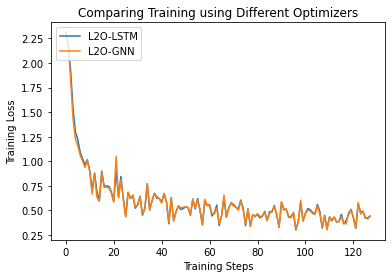

In [52]:
plt.xlabel('Training Steps')
plt.ylabel('Training Loss')
plt.title('Comparing Training using Different Optimizers')

lstm_index = acc_loss_lstm.argmin()
gnn_index = acc_loss_gnn.argmin()

plt.plot(his_lstm[lstm_index], label="L2O-LSTM")
plt.plot(his_gnn[gnn_index], label="L2O-GNN")

plt.legend(loc="upper left")
plt.show()